In [1]:
import sys
print(sys.executable)
from kmodes.kmodes import KModes

/Applications/Xcode.app/Contents/Developer/usr/bin/python3


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

from kmodes.kmodes import KModes

sns.set(style="whitegrid", context="notebook")

# directory to save figures
FIG_DIR = Path("../figures")
FIG_DIR.mkdir(parents=True, exist_ok=True)


def savefig(name, dpi=300, bbox_inches="tight"):
    """Save current matplotlib figure to the figures directory."""
    plt.savefig(FIG_DIR / name, dpi=dpi, bbox_inches=bbox_inches)

In [3]:
df = pd.read_csv("../Data/Processed/renttherunway_clean.csv")
df.head()

,user_id,item_id,fit,fit_label,height_inches,weight_lbs,bmi,bust_band,cup_size_letter,cup_size_num,...,body_type,body_type_num,rented_for,rented_for_num,rating,review_summary,review_text,review_date,review_year,review_month
0,420272,2260466,fit,1,68.0,137.0,20.828503,34.0,d,4.0,...,hourglass,3.0,vacation,6.0,10.0,So many compliments!,An adorable romper! Belt and zipper were a lit...,2016-04-20,2016,4
1,273551,153475,fit,1,66.0,132.0,21.303030,34.0,b,2.0,...,straight & narrow,6.0,other,3.0,10.0,I felt so glamourous!!!,I rented this dress for a photo shoot. The the...,2013-06-18,2013,6
2,360448,1063761,fit,1,64.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,party,4.0,10.0,It was a great time to celebrate the (almost) ...,This hugged in all the right places! It was a ...,2015-12-14,2015,12
3,909926,126335,fit,1,65.0,135.0,22.462722,34.0,c,3.0,...,pear,4.0,formal affair,2.0,8.0,Dress arrived on time and in perfect condition.,I rented this for my company's black tie award...,2014-02-12,2014,2
4,151944,616682,fit,1,69.0,145.0,21.410418,34.0,b,2.0,...,athletic,1.0,wedding,7.0,10.0,Was in love with this dress !!!,I have always been petite in my upper body and...,2016-09-26,2016,9


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192544 entries, 0 to 192543
Data columns (total 23 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   user_id          192544 non-null  int64  
 1   item_id          192544 non-null  int64  
 2   fit              192544 non-null  object 
 3   fit_label        192544 non-null  int64  
 4   height_inches    191867 non-null  float64
 5   weight_lbs       162562 non-null  float64
 6   bmi              162118 non-null  float64
 7   bust_band        174133 non-null  float64
 8   cup_size_letter  174133 non-null  object 
 9   cup_size_num     174133 non-null  float64
 10  size             192544 non-null  int64  
 11  age              191584 non-null  float64
 12  category         192544 non-null  object 
 13  body_type        177907 non-null  object 
 14  body_type_num    177907 non-null  float64
 15  rented_for       192534 non-null  object 
 16  rented_for_num   192534 non-null  floa

In [5]:
# choose categorical features for K-Modes
cat_cols = [
    "fit",          # target-like, but here for unsupervised structure
    "category",
    "body_type",
    "rented_for",
]

X_cat = df[cat_cols].dropna(how="any").copy()
print("X_cat shape:", X_cat.shape)
X_cat.head()

X_cat shape: (177897, 4)


,fit,category,body_type,rented_for
0,fit,romper,hourglass,vacation
1,fit,gown,straight & narrow,other
3,fit,dress,pear,formal affair
4,fit,gown,athletic,wedding
5,fit,dress,athletic,date


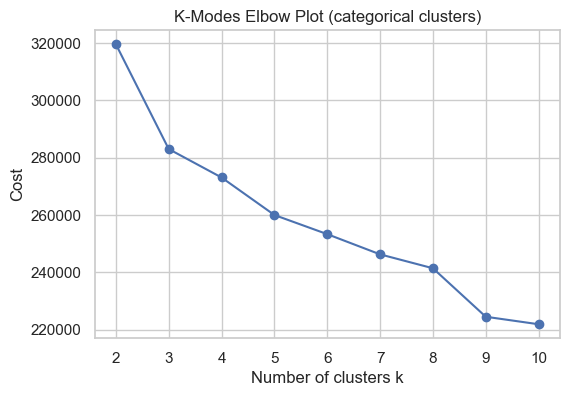

In [6]:
# elbow-style plot for K-Modes using cost
costs = []
k_values = range(2, 11)

for k in k_values:
    km = KModes(n_clusters=k, init="Huang", n_init=5, verbose=0, random_state=42)
    km.fit(X_cat)
    costs.append(km.cost_)

plt.figure(figsize=(6, 4))
plt.plot(k_values, costs, marker="o")
plt.xticks(k_values)
plt.xlabel("Number of clusters k")
plt.ylabel("Cost")
plt.title("K-Modes Elbow Plot (categorical clusters)")

savefig("kmodes_elbow.png")
plt.show()

In [7]:
# fit final K-Modes model (set best_k after looking at the elbow plot)
best_k = 5
kmodes = KModes(n_clusters=best_k, init="Huang", n_init=10, verbose=1, random_state=42)
clusters = kmodes.fit_predict(X_cat)

X_kmodes = X_cat.copy()
X_kmodes["cluster"] = clusters
X_kmodes.head()

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 271548.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 59028, cost: 259943.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 37588, cost: 269040.0
Run 3, iteration: 2/100, moves: 14353, cost: 269040.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 42684, cost: 261512.0
Run 4, iteration: 2/100, moves: 1573, cost: 261512.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 266729.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 6, iteration: 1/100, moves: 14786, cost: 282526.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 7, iteration:

,fit,category,body_type,rented_for,cluster
0,fit,romper,hourglass,vacation,1
1,fit,gown,straight & narrow,other,0
3,fit,dress,pear,formal affair,0
4,fit,gown,athletic,wedding,2
5,fit,dress,athletic,date,2


In [8]:
# inspect dominant category/body_type/rented_for per cluster
cluster_summary = (
    X_kmodes
    .groupby("cluster")
    .agg({
        "fit": lambda x: x.value_counts().index[0],
        "category": lambda x: x.value_counts().index[0],
        "body_type": lambda x: x.value_counts().index[0],
        "rented_for": lambda x: x.value_counts().index[0],
    })
)
cluster_summary

,fit,category,body_type,rented_for
cluster,,,,
0,fit,gown,pear,formal affair
1,fit,dress,hourglass,wedding
2,fit,dress,athletic,wedding
3,fit,dress,petite,party
4,fit,dress,hourglass,party


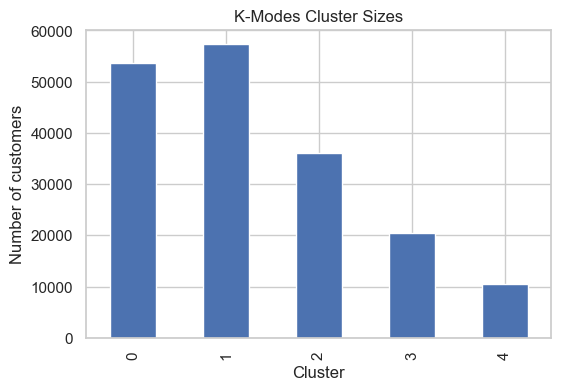

In [9]:
# bar plot of cluster sizes
cluster_counts = X_kmodes["cluster"].value_counts().sort_index()

plt.figure(figsize=(6, 4))
cluster_counts.plot(kind="bar")
plt.xlabel("Cluster")
plt.ylabel("Number of customers")
plt.title("K-Modes Cluster Sizes")

savefig("kmodes_cluster_sizes.png")
plt.show()